# Project: No-Show Medical Appointments - Brazil

## Table Of Content:

#### - Introduction
#### - Importing Data
#### - Data Wrangling
#### - Data Exploration + Question Asked
#### - Conclusion

# Introduction

##### The project named "No show Appointment" , that holds the data of Brazillian patients whom reserve an appointment for medical check. The target is the No-Show study and investigation. It is needed to be known, what are the attributes that contributes in the no show from the patients side.
##### The dataset holds many records related to patient: Gender, Age,Data of reservation, date of check, Diabetes, Handicap , Hipertension,..etc. All those records helps to understand more the patient behaviour and make it more easy to relate each attribute to the probability of no show incident
##### This dataset is provided from __[Kaggle](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)__

## Question

#### 1. What is the Relation between Has scholarship VS No Show?
#### 2.	What is the Relation of Gender VS No Show?
#### 3.	What is the relation of the new created column “Interval” and the rest of the attributes?
#### 4.	What are the General Insights of each attribute versus the number of visits? 


# Libraries Import

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Reading the Dataset

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we learned from .info(): 

1- we have no blank inputs

2- most of the column has the right type, checking the object types in the coming lines

In [6]:
# check the date type and it is found as a string , need to be converted to date format
type(df['ScheduledDay'][0])

str

In [7]:
# check the date type and it is found as a string , need to be converted to date format
type(df['AppointmentDay'][0])

str

In [8]:
type(df['Neighbourhood'][0])

str

In [9]:
type(df['Gender'][0])

str

In [10]:
type(df['No-show'][0])

str

## Making a copy Original Sheet

In [11]:
df_copy = df.copy()

# Data Wrangling

## Cleaning 1 : Adjusting Formats of Column contents

In [12]:
# convert PatiendId to float
df_copy['PatientId'] = df_copy['PatientId'].astype(float)

### Testing

In [13]:
df_copy['PatientId'].dtype

dtype('float64')

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
df_copy['PatientId'].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64

## Cleaning 2: Adjusting Formats of Column contents

In [16]:
# then we need to convert the ScheduledDay and AppointmentDay to date format
df_copy['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

## Testing and Checking

In [17]:
df_copy['ScheduledDay'].head()

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

### Converting the date format to Year-Month-day format with no hours

In [18]:
df_copy['ScheduledDay'] = df_copy['ScheduledDay'].apply(lambda x: x.strftime("%Y-%m-%d"))

### Testing

In [19]:
df_copy['ScheduledDay'].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: ScheduledDay, dtype: object

## Cleaning 3: Adjusting Formats of Column contents

In [20]:
df_copy['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

## Testing and Checking

In [21]:
df_copy['AppointmentDay'].head()

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

### Converting the date format to Year-Month-day format with no hours

In [22]:
df_copy['AppointmentDay'] = df_copy['AppointmentDay'].apply(lambda x: x.strftime("%Y-%m-%d"))

### Testing

In [23]:
df_copy['AppointmentDay'].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: AppointmentDay, dtype: object

## After the last step, the dates are string , we need to get them back to date format

In [24]:
# we convert back to date format with no hours, to have the difference in days only
df_copy['AppointmentDay'] =  pd.to_datetime(df_copy['AppointmentDay'])
df_copy['ScheduledDay'] =  pd.to_datetime(df_copy['ScheduledDay'])

### Testing

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [26]:
df_copy.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Creating New Column

In [27]:
# we will create a new column called interval , which is the time between the scheduled and the appoitnment 
df_copy['Interval'] = df_copy['AppointmentDay'] - df_copy['ScheduledDay']

## Testing

In [28]:
df_copy['Interval'].head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: Interval, dtype: timedelta64[ns]

### Exploring

In [29]:
df_copy['Interval'].value_counts()

0 days      38563
2 days       6725
4 days       5290
1 days       5213
7 days       4906
            ...  
139 days        1
123 days        1
146 days        1
-6 days         1
132 days        1
Name: Interval, Length: 131, dtype: int64

In [30]:
# this is to convert the time delta of interval to int
df_copy['Interval'] = df_copy['Interval'].dt.days.astype('int16')

In [31]:
# Check
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  Interval        110527 non-null  int

## Testing

In [32]:
df_copy['Interval'].value_counts()

 0      38563
 2       6725
 4       5290
 1       5213
 7       4906
        ...  
 117        1
 146        1
 82         1
-6          1
 127        1
Name: Interval, Length: 131, dtype: int64

## Cleaning 4: Check the -ve value
### as we cant have apointment before the schedule

In [33]:
# extracting the -ve values
df_copy.query('Interval < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Interval
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [34]:
#counting how many interval are less than zero , it results 5
df_copy.query('Interval < 0').count()[0]

5

In [35]:
#creating list of the indexes to be changed
loop=[27033,55226,64175,71533,72362]
type(loop[0])

int

In [36]:
# create for loop to set the -1 to Zeroes
for i in loop:
    df_copy.loc[i,'Interval'] = 0

### Testing

In [37]:
# we have no 
df_copy.query('Interval < 0').count()[0]

0

In [38]:
for i in loop:
    print(df_copy.iloc[i]['Interval'])

0
0
0
0
0


# Cleaning 5: Checking the duplicates

## In whole Enteries

In [39]:
df_copy.duplicated().sum()

0

### We have no duplicated rows to be removed

# Cleaning 6: Checking the Column content

In [40]:
df_copy.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Interval'],
      dtype='object')

In [41]:
# extracting the -ve values
df_copy.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Interval
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


## Cleaning

In [42]:
df_copy.drop(99832, inplace=True)

## Testing

In [43]:
df_copy.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Interval


# Cleaning 7: Removing unnecessary columns

In [44]:
# it seems that AppointmentID is not needed and it stop duplicates to be vigilant
df_copy.drop('AppointmentID', axis='columns', inplace=True)

## Testing

In [45]:
df_copy.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Interval'],
      dtype='object')

# Cleaning 8: Remove Duplicates

In [46]:
# check duplicates
df_copy.duplicated().sum()

4222

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   Gender          110526 non-null  object        
 2   ScheduledDay    110526 non-null  datetime64[ns]
 3   AppointmentDay  110526 non-null  datetime64[ns]
 4   Age             110526 non-null  int64         
 5   Neighbourhood   110526 non-null  object        
 6   Scholarship     110526 non-null  int64         
 7   Hipertension    110526 non-null  int64         
 8   Diabetes        110526 non-null  int64         
 9   Alcoholism      110526 non-null  int64         
 10  Handcap         110526 non-null  int64         
 11  SMS_received    110526 non-null  int64         
 12  No-show         110526 non-null  object        
 13  Interval        110526 non-null  int16         
dtypes: datetime64[ns](2), float64(1), in

### Cleaning

In [48]:
df_copy.drop_duplicates(inplace=True)

### Testing

In [49]:
# check duplicates
df_copy.duplicated().sum()

0

### Checking

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106304 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106304 non-null  float64       
 1   Gender          106304 non-null  object        
 2   ScheduledDay    106304 non-null  datetime64[ns]
 3   AppointmentDay  106304 non-null  datetime64[ns]
 4   Age             106304 non-null  int64         
 5   Neighbourhood   106304 non-null  object        
 6   Scholarship     106304 non-null  int64         
 7   Hipertension    106304 non-null  int64         
 8   Diabetes        106304 non-null  int64         
 9   Alcoholism      106304 non-null  int64         
 10  Handcap         106304 non-null  int64         
 11  SMS_received    106304 non-null  int64         
 12  No-show         106304 non-null  object        
 13  Interval        106304 non-null  int16         
dtypes: datetime64[ns](2), float64(1), in

## Summary of Cleaning Steps:

####        - Check nulls and the formats of each column content using [.info()]
####        - For objects type, I dig more for the type of the content using the type()
####        - Adjust the Patient ID column from string to float
####        - Convert Schedule and Appointment day to date format and get it in Days
####        - Create new Column named “Interval”, Appointment day – Schedule Day
####        - Convert Interval content to days instead of string
####        - -ve values in the interval column, which means that Appointment day was before the schedule one
####        - -ve values in the “Age”, as the min should be Zero
####        - Removed the unnecessary columns, which is the Appointment ID. This column was opposing find the whole duplicated row as it is different in each entry. By removing this column, we found duplicates
####        - Removed 4222 duplicated rows


# Exploring After Cleaning

In [51]:
df_copy.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Interval'],
      dtype='object')

### Question1: Relation between Has scholarship VS No Show

In [52]:
NoShow_Scholarship=df_copy.groupby(['No-show','Scholarship'])['No-show'].count()

In [53]:
NoShow_Scholarship

No-show  Scholarship
No       0              76679
         1               7935
Yes      0              19200
         1               2490
Name: No-show, dtype: int64

In [54]:
Schol_noShow = 100* (NoShow_Scholarship[3]/(NoShow_Scholarship[3] + NoShow_Scholarship [1]))
NoSchol_noShow = 100* (NoShow_Scholarship[2]/(NoShow_Scholarship[2] + NoShow_Scholarship [0]))
Big_Portion = 100* (NoShow_Scholarship[0]/(NoShow_Scholarship[0] + NoShow_Scholarship [1] + NoShow_Scholarship[2] + NoShow_Scholarship [3]))

In [55]:
print("{}% of the patient have Scholarship and didnt Show up".format(Schol_noShow.round(0)))
print("While {}% of the patient have No_Scholarship and didnt Show up".format(NoSchol_noShow.round(0)))

24.0% of the patient have Scholarship and didnt Show up
While 20.0% of the patient have No_Scholarship and didnt Show up


Text(0, 0.5, 'Total Visits')

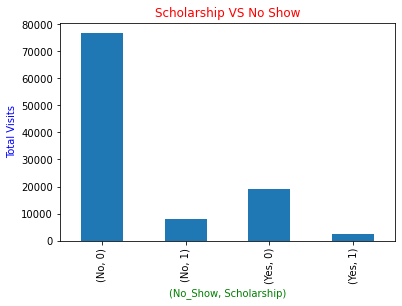

In [56]:
NoShow_Scholarship.plot(kind='bar')
plt.title('Scholarship VS No Show', color='r')
plt.xlabel('(No_Show, Scholarship)', color='g')
plt.ylabel('Total Visits', color='b')

In [57]:
print("The Highest Portion of Visits are Patient with No Shoclarship and did show up with percentage of {}".format(Big_Portion.round(0)))

The Highest Portion of Visits are Patient with No Shoclarship and did show up with percentage of 72.0


## Answer 1:
### 1- 72% of the Patient that paid visits have no scholarship 
### 2- 24% of the patient have Scholarship and didnt Show up
### 3- 20% of the patient have No_Scholarship and didnt Show up
## Finally, Patients with no Scholarship are more likely to show up to the appointment

# *******************************************************

# Question 2: Relation of Gender VS No Show ?

In [58]:
NoShow_Gender=df_copy.groupby(['No-show','Gender'])['Gender'].count()

In [59]:
NoShow_Gender

No-show  Gender
No       F         55324
         M         29290
Yes      F         14263
         M          7427
Name: Gender, dtype: int64

Text(0, 0.5, 'Total Visits')

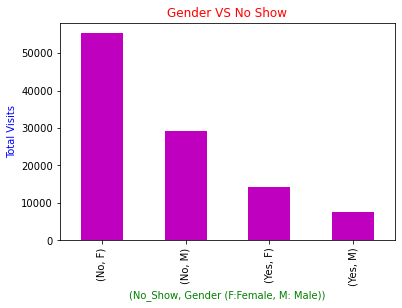

In [60]:
NoShow_Gender.plot(kind='bar', color='m')
plt.title('Gender VS No Show', color='r')
plt.xlabel('(No_Show, Gender (F:Female, M: Male))', color='g')
plt.ylabel('Total Visits', color='b')

# Answer 2:

In [61]:
Female_contribution = 100 * (NoShow_Gender[0] + NoShow_Gender[2])/(NoShow_Gender[0] + NoShow_Gender[1] + NoShow_Gender[2] + NoShow_Gender[3] )
print("Female has the most of the visits with contribution of {}% ".format(Female_contribution.round(0)))

Female has the most of the visits with contribution of 65.0% 


## **********

# Question 3: Interval Insight ?

In [62]:
df_copy.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Interval'],
      dtype='object')

In [63]:
# Shows the percentage per each day Interval
df_copy['Interval'].value_counts(normalize=True , ascending=False)*100

0      33.458760
2       6.247178
4       4.924556
1       4.806969
7       4.519115
         ...    
101     0.000941
132     0.000941
151     0.000941
146     0.000941
127     0.000941
Name: Interval, Length: 129, dtype: float64

### Exploring the below 10 days interval

In [64]:
df_interval = df_copy.query('Interval <= 10')

In [65]:
df_interval.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Interval
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [66]:
df_interval['Interval'].value_counts()

0     35568
2      6641
4      5235
1      5110
7      4804
6      3990
5      3243
3      2686
8      2273
9      1580
10     1359
Name: Interval, dtype: int64

### Insight 1

In [67]:
# Relation between Interval and Showing up
NoShow_interval = df_interval.groupby(['No-show','Interval'])['No-show'].count()

In [68]:
NoShow_interval

No-show  Interval
No       0           33962
         1            4020
         2            5060
         3            2058
         4            4019
         5            2391
         6            2999
         7            3520
         8            1621
         9            1148
         10            932
Yes      0            1606
         1            1090
         2            1581
         3             628
         4            1216
         5             852
         6             991
         7            1284
         8             652
         9             432
         10            427
Name: No-show, dtype: int64

Text(0, 0.5, 'Total Visits')

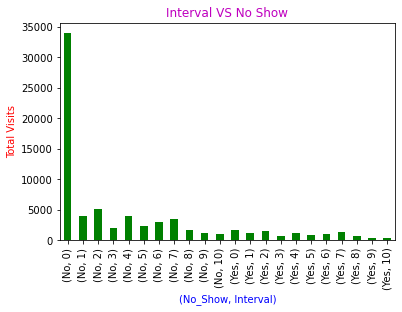

In [69]:
NoShow_interval.plot(kind='bar', color='g')
plt.title('Interval VS No Show', color='m')
plt.xlabel('(No_Show, Interval)', color='b')
plt.ylabel('Total Visits', color='r')

In [70]:
# shows the percentage of patients that has zero interval and did show up
Show_Interval = 100*NoShow_interval[0]/NoShow_interval.sum()

In [71]:
Show_Interval.round(0)

47.0

### Insight 2

In [72]:
# Relation between Interval and Gender
Gender_interval = df_interval.groupby(['Gender','Interval','No-show'])['No-show'].count()

In [73]:
Gender_interval

Gender  Interval  No-show
F       0         No         21453
                  Yes          871
        1         No          2592
                  Yes          736
        2         No          3423
                  Yes         1054
        3         No          1377
                  Yes          395
        4         No          2681
                  Yes          808
        5         No          1606
                  Yes          562
        6         No          2021
                  Yes          695
        7         No          2266
                  Yes          860
        8         No          1092
                  Yes          452
        9         No           769
                  Yes          295
        10        No           615
                  Yes          293
M       0         No         12509
                  Yes          735
        1         No          1428
                  Yes          354
        2         No          1637
                  Yes        

Text(0, 0.5, 'Total Visits')

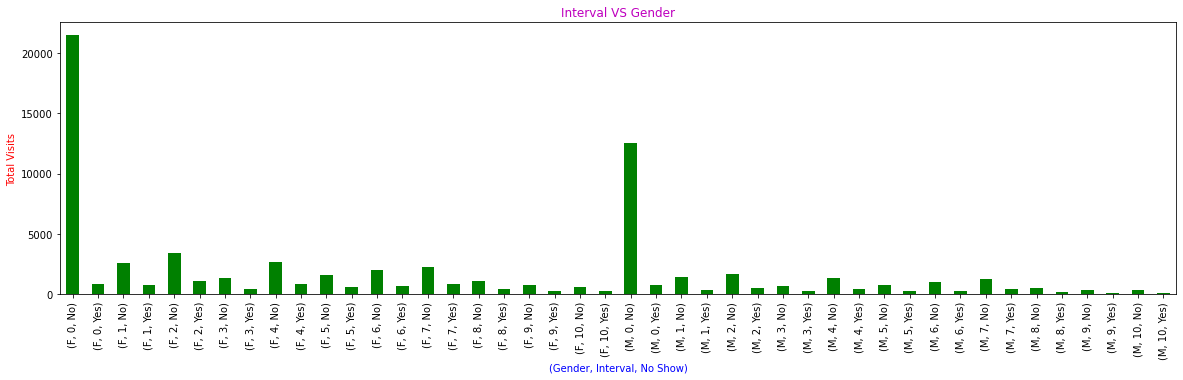

In [74]:
Gender_interval.plot(kind='bar', color='g',figsize=(20,5))
plt.title('Interval VS Gender', color='m')
plt.xlabel('(Gender, Interval, No Show)', color='b')
plt.ylabel('Total Visits', color='r')

In [75]:
F_Interval = (100* Gender_interval[0]/Gender_interval.sum()).round(0)
M_Interval = (100* Gender_interval[22]/Gender_interval.sum()).round(0)
F_Interval,M_Interval

(30.0, 17.0)

## Answer 3:

### Insight 1: Zero Interval , has the highest probability of Showing Up with 47%
### Insight 2: 
##### Femals has highest probability to show with interval zero by 30% 
##### while men has 2nd highest to show with interval zero by 17%

## *******************************************

# Question4: General Insights

In [76]:
df_copy.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Interval'],
      dtype='object')

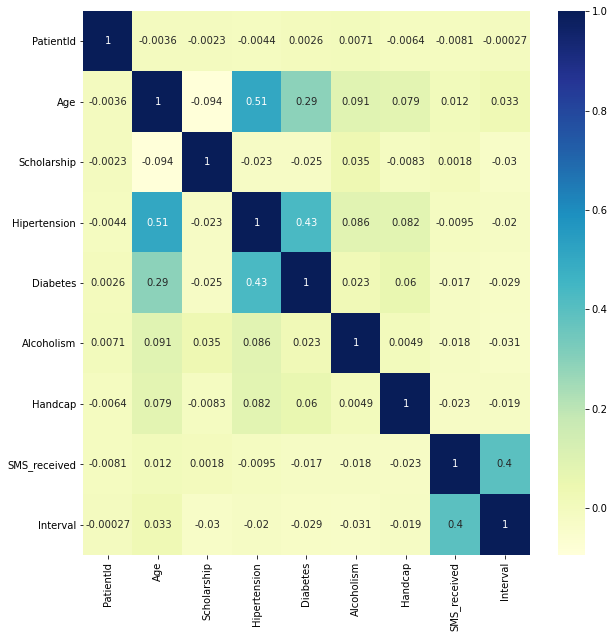

In [98]:
correlation = df_copy.corr()
f,a = plt.subplots(figsize=(10,10))
a=sn.heatmap(correlation, annot=True,cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D470DFDD48>,
      dtype=object)

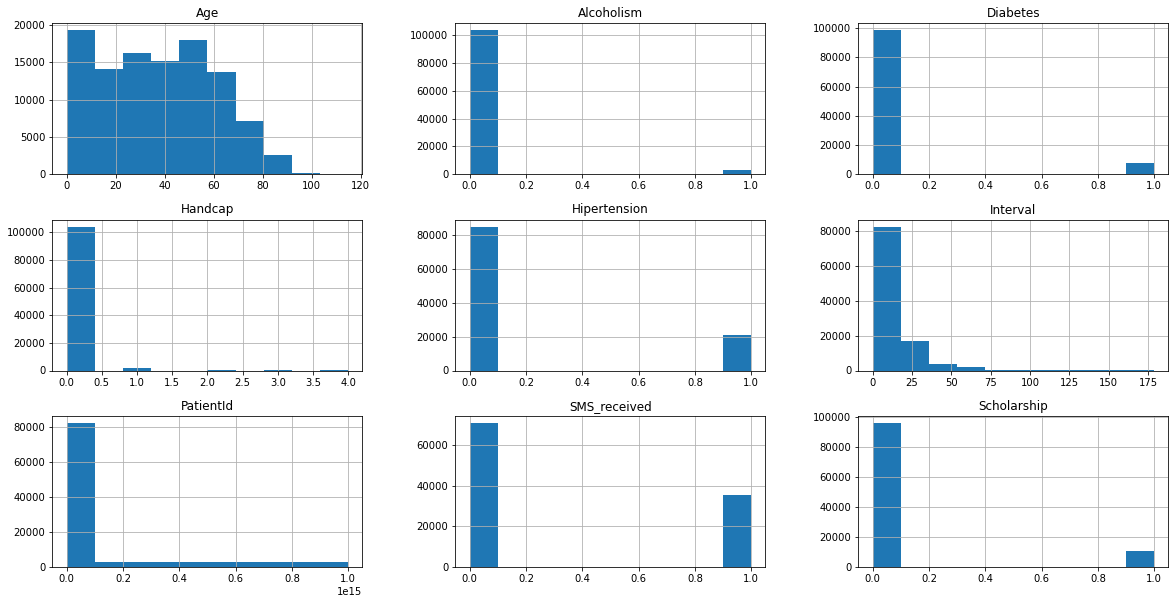

In [308]:
df_copy.hist(figsize=(20,10))

# Answer4:

### 1- Mostly all the patients are Alcohol and Diabetes Free
### 2- Mostly all the patients have no Scholarship
### 3- 20% of the Patients suffers from Hypertension
### 4- we have correlation between hipertension and Age , with 50%



# ******************************************************************
# Conclusion

## Results: Our Data suggest that

### 1. Patients with Scholarhip are more likely to skip the appointment than the ones with no Scholarship
### 2. 72% of the visits are paid by patients with no Scholarship
### 3. Females have the most contribution in both Showing up and Total Visits by 65%
### 4. If the Appointement are in the same day or the next day of reservation, Patients are 47% probable to Show up
### 5. More than 90% of the patients are Alcholo and Diabetes Free
### 6. Around 20% of the patients are suffering from Hipertension

# Limitation:

### 1. Most of the dataset attributes are categorial , therefore no room of more statistics and correlations
### 2. All our answers are based on descriptive analysis no hypothesis or assumptions
### 3. Correlations are of very weak integrity as all the data are categorial
### 4. Some Attributes seems to show more results, but they are all biased to single entry. For Example, more than 90% of the patients are alchohol free and diabetes free, so we can't link this to no show 